In [3]:
import matplotlib.pyplot as plt
import pandas as pd

from bubblekicker.bubblekicker import (BubbleKicker, batchbubblekicker, bubble_properties_calculate, 
                                       _bubble_properties_filter, bubble_properties_plot)

from bubblekicker.pipelines import CannyPipeline, AdaptiveThresholdPipeline

In [4]:
%matplotlib inline

In [9]:
path = r'C:\Users\Giacomo\Documents\gitRepos\Serena\shared_nbks/'
imgname = 'classe 5.JPG'

In [10]:
path + imgname

'C:\\Users\\Giacomo\\Documents\\gitRepos\\Serena\\shared_nbks/classe 5.JPG'

Steps undertaken since from raw image:
edge-detect with thresholds 120 -> 180 - opencv
dilate with footprintsize 3 - opencv
fill holes - opencv
clear border with buffer size 3 and bgval 1 -  skimage
erode with footprintsize 1 - opencv




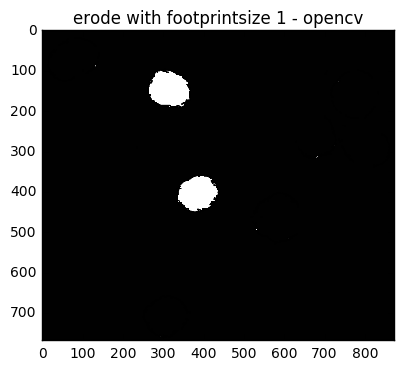

In [12]:
# CANNY PIPELINE
bubbler = CannyPipeline(path + imgname, channel='blue')
result = bubbler.run([120, 180], 3, 3, 1, 1)
# show the resulting image of the detected bubbles
bubbler.plot()
# show the individual steps performed to get this result
bubbler.what_have_i_done()

### example filtering with standard values

In [14]:
#calculate properties
marker_image, props = bubble_properties_calculate(result) 

{'min': 0.92}
{'max': 1.6, 'min': 0.2}


In [15]:
props.head()

,area,centroid,convex_area,equivalent_diameter,perimeter,convexity,circularity_reciprocal
label,,,,,,,
1,59,"(200.101694915, 646.406779661)",62,8.667245,27.313708,2.160087,1.006235
2,156,"(202.724358974, 726.679487179)",164,14.093451,55.142136,2.829053,1.551075
3,133,"(205.037593985, 409.571428571)",144,13.013103,46.727922,2.846264,1.306446
4,62,"(221.161290323, 586.709677419)",73,8.884866,32.106602,1.931067,1.323083
5,74,"(222.72972973, 380.216216216)",83,9.706685,38.142136,1.940112,1.564474


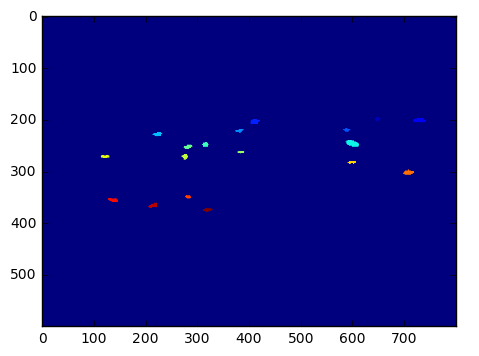

In [16]:
plt.imshow(marker_image)

### example filtering with custom values

In [17]:
#calculate properties
marker_image, props = bubble_properties_calculate(result, 
                                                  rules={'convexity':{'min':0.}, 
                                                                 'circularity_reciprocal':{'max':1.2, 'min':0.3}}) 

{'max': 1.2, 'min': 0.3}
{'min': 0.0}


In [18]:
props.head()

,area,centroid,convex_area,equivalent_diameter,perimeter,convexity,circularity_reciprocal
label,,,,,,,
1,59,"(200.101694915, 646.406779661)",62,8.667245,27.313708,2.160087,1.006235
8,86,"(249.372093023, 314.546511628)",91,10.464158,33.313708,2.581520,1.026922
11,91,"(272.692307692, 275.076923077)",100,10.764051,35.556349,2.559318,1.105562
16,58,"(350.24137931, 281.155172414)",63,8.593480,27.899495,2.078891,1.067960


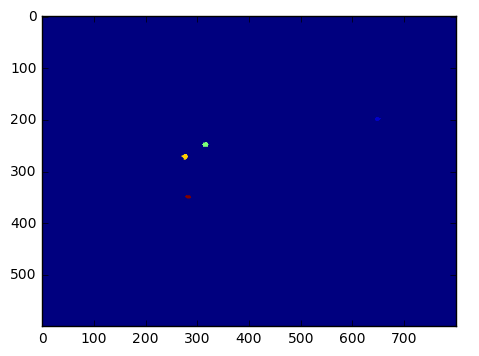

In [19]:
plt.imshow(marker_image)

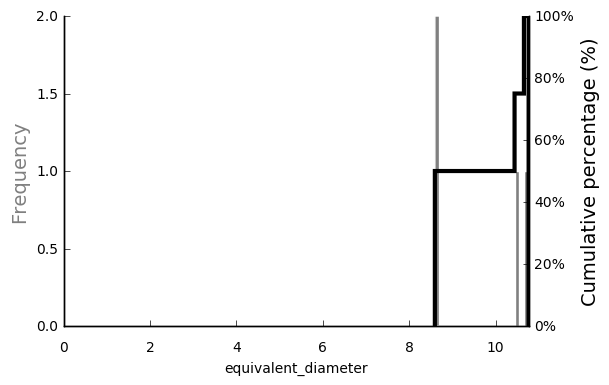

In [20]:
fig, axs = bubble_properties_plot(props, "equivalent_diameter")  # make a plot

Steps undertaken since from raw image:
adaptive threshold bubble detection with blocksize 91 and cvalue 18 - opencv
clear border with buffer size 3 and bgval 1 -  skimage
erode with footprintsize 1 - opencv




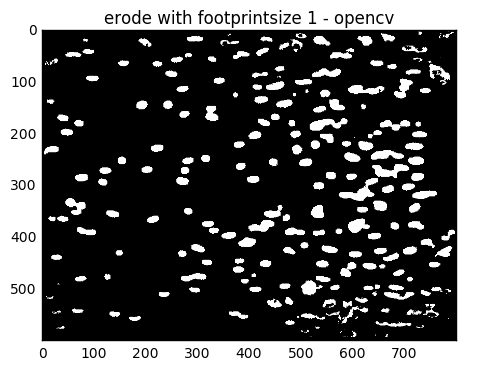

In [21]:
# ADAPTIVE THRESHOLD PIPELINE
bubbler = AdaptiveThresholdPipeline(path + imgname, channel='red')
result = bubbler.run(91, 18, 3, 1, 1)
# show the resulting image of the detected bubbles
bubbler.plot()

# show the individual steps performed to get this result
bubbler.what_have_i_done()

In [22]:
#calculate properties
marker_image, props = bubble_properties_calculate(result, 
                                                  rules={'convexity':{'min':0.}, 
                                                                 'circularity_reciprocal':{'max':1.2, 'min':0.3}}) 

{'max': 1.2, 'min': 0.3}
{'min': 0.0}


In [23]:
props.head()

,area,centroid,convex_area,equivalent_diameter,perimeter,convexity,circularity_reciprocal
label,,,,,,,
7,17,"(10.5294117647, 360.176470588)",20,4.652426,13.035534,1.304128,0.795424
10,17,"(14.0, 766.470588235)",24,4.652426,14.828427,1.146447,1.029275
29,33,"(40.303030303, 488.606060606)",37,6.482045,21.656854,1.523767,1.131011
40,15,"(63.0, 747.133333333)",17,4.370194,12.863961,1.166048,0.877907
55,12,"(91.8333333333, 457.75)",14,3.908820,12.071068,0.994113,0.966274


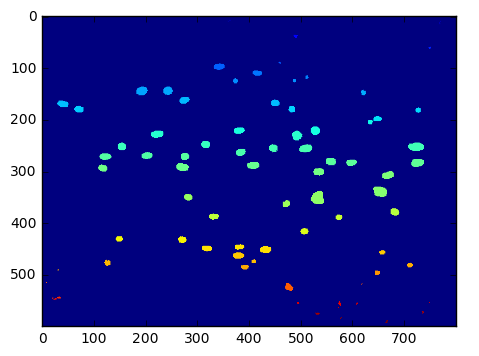

In [24]:
plt.imshow(marker_image)